In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Placement/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
print(df.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [71]:
x = df.drop(['CustomerID', 'Genre','Age'], axis=1)

/tmp/ipython-input-2087529479.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


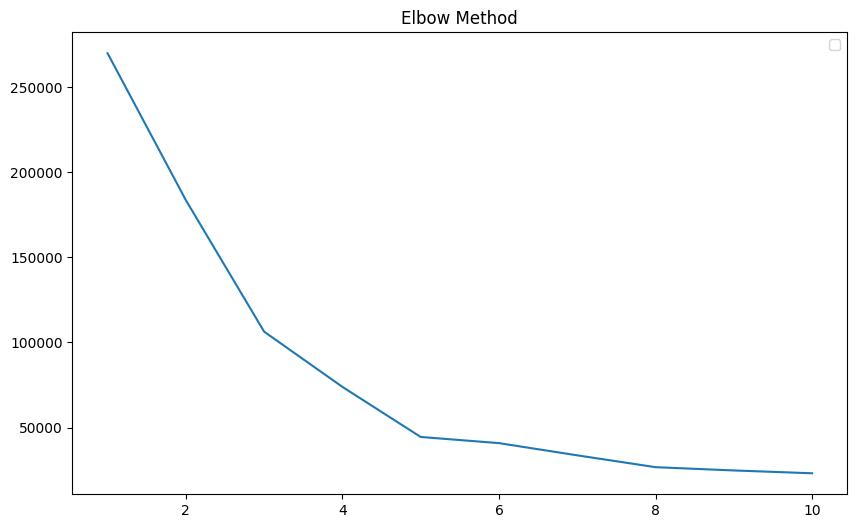

In [72]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.title("Elbow Method")
plt.plot(range(1, 11), wcss)
plt.legend()

In [80]:
kmeans = KMeans(n_clusters=5, init='k-means++' ,  random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [86]:
y_kmeans = kmeans.predict(x)

In [87]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [88]:
kmeans.inertia_

44448.45544793369

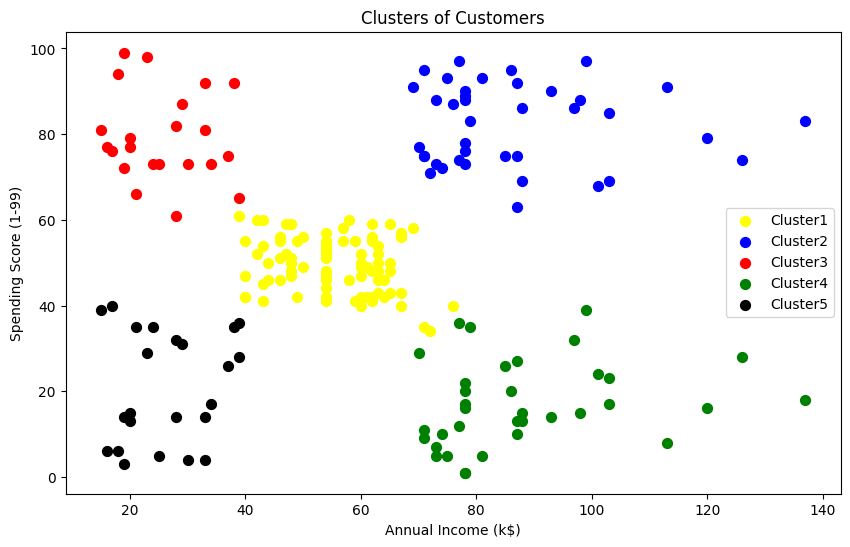

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(x.iloc[kmeans.labels_ == 0, 0], x.iloc[kmeans.labels_ == 0, 1], color = 'yellow', label = 'Cluster1',s=50)
plt.scatter(x.iloc[kmeans.labels_ == 1, 0], x.iloc[kmeans.labels_ == 1, 1], color = 'blue', label = 'Cluster2',s=50)
plt.scatter(x.iloc[kmeans.labels_ == 2, 0], x.iloc[kmeans.labels_ == 2, 1], color = 'red', label = 'Cluster3',s=50)
plt.scatter(x.iloc[kmeans.labels_ == 3, 0], x.iloc[kmeans.labels_ == 3, 1], color = 'green', label = 'Cluster4',s=50)
plt.scatter(x.iloc[kmeans.labels_ == 4, 0], x.iloc[kmeans.labels_ == 4, 1], color = 'black', label = 'Cluster5',s=50)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-99)')
plt.legend()
plt.show()

In [100]:
plt.figure(figsize=(10, 6))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1', s = 50)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2', s = 50)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'red', label = 'Cluster 3', s = 50)
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'green', label = 'Cluster 4', s = 50)
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'black', label = 'Cluster 5', s = 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'magenta', label = 'Centroids', marker= '*')

plt.title('Clusters of Customers with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-99)')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)

<Figure size 1000x600 with 0 Axes>

In [96]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0, 1], c = 'yellow', label = 'Cluster 1',s=50)
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1, 1], c = 'green', label = 'Cluster 2',s=50)
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2, 1], c = 'blue', label = 'Cluster 3',s=50)
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3, 1], c = 'black', label = 'Cluster 4',s=50)
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4, 1], c = 'red', label = 'Cluster 5',s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'magenta', label = 'Centroids', marker='*')

plt.title('Clusters of Customers with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-99)')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)